# Day 1 Laboratory - Familiarise with Jupyter and Pandas

**code cells**: contain Python code to be executed

**markdown cells**: contains text in markdown format

A: insert a cell above the current cell

B: insert a cell below the current cell

M: convert the current cell to a markdown cell

Y: convert the current cell to a code cell

Shift+Enter: run the current cell and advance to the next cell

Enter (when cell selected): go into edit mode

Esc (when editing): exit from edit mode 

## Import libraries

In [233]:
import pandas as pd
import numpy as np

## Load dataset and explore it

In [234]:
df = pd.read_csv("https://ssciwr.github.io/jupyter-data-exploration/data.csv")

In [235]:
df # Try df.head(5)

,Name,Age,Sex,Height,Eye colour,Wears glasses
0,Bob,12,Male,130.0,blue,yes
1,Simon,13,Male,120.0,blue,no
2,Clare,15,Female,142.5,green,no
3,Jose,11,Male,117.0,brown,no
4,Hannah,9,Female,111.0,blue,yes
5,Ryan,11,Male,124.0,brown,no
6,Craig,12,Male,124.0,brown,no
7,Suzy,14,Female,137.0,grey,yes
8,Chris,10,Male,112.5,brown,no
9,Josie,8,Female,107.0,brown,no


### Summarisation

In [236]:
df.shape

(20, 6)

In [237]:
df.count()

Name             20
Age              20
Sex              20
Height           20
Eye colour       20
Wears glasses    20
dtype: int64

In [238]:
df.columns

Index(['Name', 'Age', 'Sex', 'Height', 'Eye colour', 'Wears glasses'], dtype='object')

In [239]:
df.dtypes

Name              object
Age                int64
Sex               object
Height           float64
Eye colour        object
Wears glasses     object
dtype: object

In [240]:
df.memory_usage(deep=True)

Index             128
Name             1241
Age               160
Sex              1236
Height            160
Eye colour       1229
Wears glasses    1185
dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           20 non-null     object 
 1   Age            20 non-null     int64  
 2   Sex            20 non-null     object 
 3   Height         20 non-null     float64
 4   Eye colour     20 non-null     object 
 5   Wears glasses  20 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.1+ KB


### Memory optimisation

In [242]:
df.memory_usage(deep=True)

Index             128
Name             1241
Age               160
Sex              1236
Height            160
Eye colour       1229
Wears glasses    1185
dtype: int64

In [243]:
df['Eye colour'].unique()

array(['blue', 'green', 'brown', 'grey'], dtype=object)

In [244]:
df['Eye colour'].value_counts() # Try with other columns

Eye colour
blue     8
brown    8
grey     3
green    1
Name: count, dtype: int64

In [245]:
df['Sex_cat'] = df['Sex'].astype('category')
df.memory_usage(deep=True)

Index             128
Name             1241
Age               160
Sex              1236
Height            160
Eye colour       1229
Wears glasses    1185
Sex_cat           252
dtype: int64

In [246]:
df = df.drop(columns=['Sex_cat'])
df['Sex'] = df['Sex'].astype('category')
df['Eye colour'] = df['Eye colour'].astype('category')
df["Wears glasses"] = df["Wears glasses"].map({"yes": True, "no": False})
df.memory_usage(deep=True)

Index             128
Name             1241
Age               160
Sex               252
Height            160
Eye colour        438
Wears glasses      20
dtype: int64

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Name           20 non-null     object  
 1   Age            20 non-null     int64   
 2   Sex            20 non-null     category
 3   Height         20 non-null     float64 
 4   Eye colour     20 non-null     category
 5   Wears glasses  20 non-null     bool    
dtypes: bool(1), category(2), float64(1), int64(1), object(1)
memory usage: 996.0+ bytes


In [248]:
df.describe() # add include='all' as argument

,Age,Height
count,20.000000,20.000000
mean,9.350000,112.200000
std,3.869925,23.283945
min,2.000000,59.000000
25%,7.500000,104.750000
50%,9.500000,111.750000
75%,12.000000,124.000000
max,16.000000,158.000000


### Slicing

In [249]:
names = df['Name']
names

0         Bob
1       Simon
2       Clare
3        Jose
4      Hannah
5        Ryan
6       Craig
7        Suzy
8       Chris
9       Josie
10     Claire
11       John
12      Agnes
13     Robert
14      Julia
15     Fabian
16     Joseph
17    Roberta
18      Chris
19      Lucas
Name: Name, dtype: object

In [250]:
names[0]

'Bob'

In [251]:
names[0:3] # Trick for reading: start from 0, give me 3. This is a shortcut for names.iloc[0:3]

0      Bob
1    Simon
2    Clare
Name: Name, dtype: object

In [252]:
for name in names:
    print(name, ", ", end="")

Bob , Simon , Clare , Jose , Hannah , Ryan , Craig , Suzy , Chris , Josie , Claire , John , Agnes , Robert , Julia , Fabian , Joseph , Roberta , Chris , Lucas , 

In [253]:
df[['Name', 'Age']] #add [0:5] for row selection. This is a shortcut for df.iloc[0:5, [True, True, False, False, False, False]]

,Name,Age
0,Bob,12
1,Simon,13
2,Clare,15
3,Jose,11
4,Hannah,9
5,Ryan,11
6,Craig,12
7,Suzy,14
8,Chris,10
9,Josie,8


In [254]:
df.loc[0:5, ['Name','Age']]

,Name,Age
0,Bob,12
1,Simon,13
2,Clare,15
3,Jose,11
4,Hannah,9
5,Ryan,11


In [255]:
df.loc[0:5]

,Name,Age,Sex,Height,Eye colour,Wears glasses
0,Bob,12,Male,130.0,blue,True
1,Simon,13,Male,120.0,blue,False
2,Clare,15,Female,142.5,green,False
3,Jose,11,Male,117.0,brown,False
4,Hannah,9,Female,111.0,blue,True
5,Ryan,11,Male,124.0,brown,False


In [256]:
df.loc[:, 'Name']

0         Bob
1       Simon
2       Clare
3        Jose
4      Hannah
5        Ryan
6       Craig
7        Suzy
8       Chris
9       Josie
10     Claire
11       John
12      Agnes
13     Robert
14      Julia
15     Fabian
16     Joseph
17    Roberta
18      Chris
19      Lucas
Name: Name, dtype: object

In [257]:
df.loc[0]

Name               Bob
Age                 12
Sex               Male
Height           130.0
Eye colour        blue
Wears glasses     True
Name: 0, dtype: object

In [258]:
df.loc[[1,3,5,7]] #add ["Height", "Wears glasses"] to select columns. Same as df.iloc[[1,3,5,7], [False, False, False, True, False, True]]

,Name,Age,Sex,Height,Eye colour,Wears glasses
1,Simon,13,Male,120.0,blue,False
3,Jose,11,Male,117.0,brown,False
5,Ryan,11,Male,124.0,brown,False
7,Suzy,14,Female,137.0,grey,True


### Filtering (conditionals)

a statement that is either true or false
- a == b : true if a is equal to b
- a != b : true if a is not equal to b
- a > b : true if a is greater than b
- a >= b : true if a is greater than or equal to b
- a < b : true if a is less than b
- a <= b : true if a is less than or equal to b

they can be combined
- a & b : true if a and b are both true, otherwise false
- a | b : true if a or b is true, otherwise false

if a is a pandas Series, the result is a Boolean Series
- with a True or False result for each row
- which can be used by loc to select data

In [259]:
df['Age'] > 9

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19    False
Name: Age, dtype: bool

In [260]:
df.loc[df['Age'] > 9]

,Name,Age,Sex,Height,Eye colour,Wears glasses
0,Bob,12,Male,130.0,blue,True
1,Simon,13,Male,120.0,blue,False
2,Clare,15,Female,142.5,green,False
3,Jose,11,Male,117.0,brown,False
5,Ryan,11,Male,124.0,brown,False
6,Craig,12,Male,124.0,brown,False
7,Suzy,14,Female,137.0,grey,True
8,Chris,10,Male,112.5,brown,False
10,Claire,16,Female,158.0,blue,False
17,Roberta,11,Female,121.0,grey,False


In [261]:
df.loc[df['Wears glasses'] == 'yes']

,Name,Age,Sex,Height,Eye colour,Wears glasses


In [262]:
df.loc[(df["Age"] > 9) & (df["Eye colour"] == "blue")]

,Name,Age,Sex,Height,Eye colour,Wears glasses
0,Bob,12,Male,130.0,blue,True
1,Simon,13,Male,120.0,blue,False
10,Claire,16,Female,158.0,blue,False


In [263]:
df.loc[(df["Age"] < 7) | (df["Wears glasses"] == "yes")]

,Name,Age,Sex,Height,Eye colour,Wears glasses
11,John,5,Male,97.0,grey,False
12,Agnes,6,Female,98.0,blue,True
14,Julia,3,Female,63.0,blue,False
15,Fabian,5,Male,101.0,blue,False
19,Lucas,2,Male,59.0,blue,False


In [264]:
df.groupby(["Sex"])

### Visualisation

<Axes: >

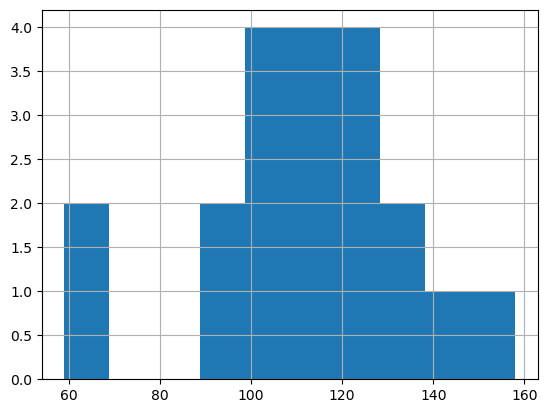

In [265]:
df['Height'].hist() # Try with other columns

<Axes: >

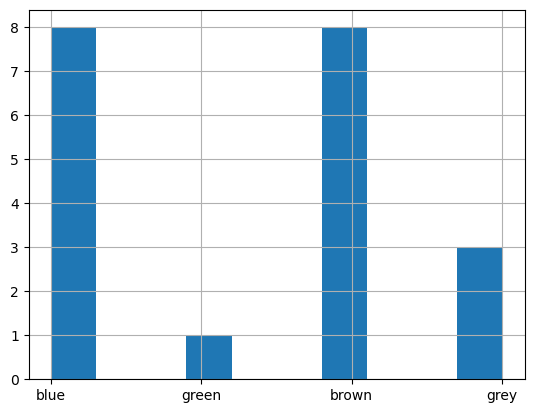

In [266]:
df['Eye colour'].hist() # same as df['Eye colour'].value_counts().plot.bar()

<Axes: xlabel='Age', ylabel='Height'>

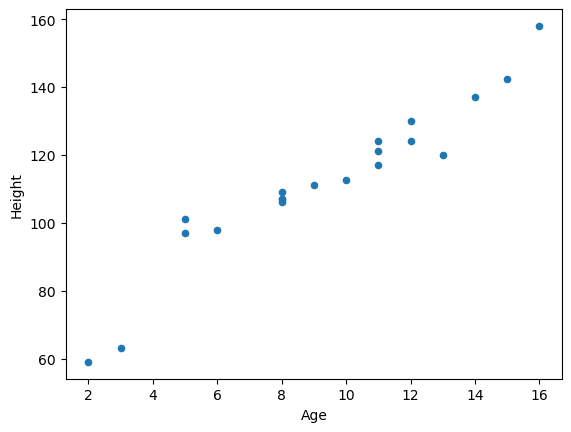

In [267]:
df.plot.scatter(x="Age", y="Height")

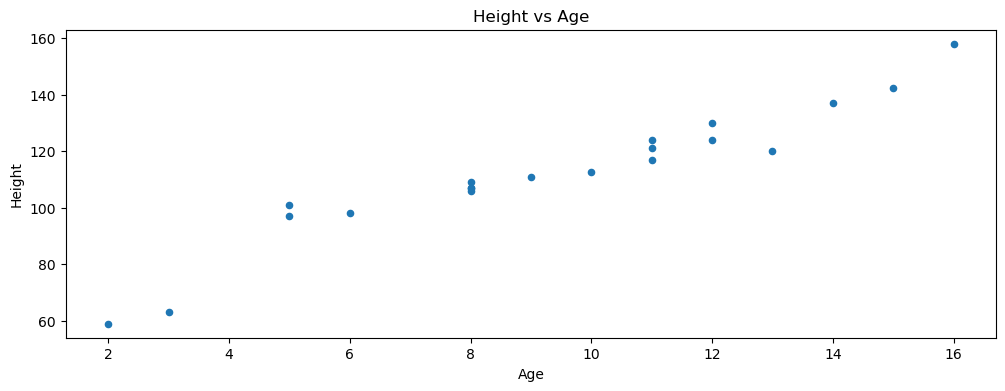

In [268]:
import matplotlib.pyplot as plt
# do the same thing, but use matplotlib to customise the plot
# make a larger figure
fig, axs = plt.subplots(figsize=(12, 4))
# pass our axis to pandas plot
df.plot.scatter(x="Age", y="Height", ax=axs)
# set a title
plt.title("Height vs Age")
# display the plot
plt.show()

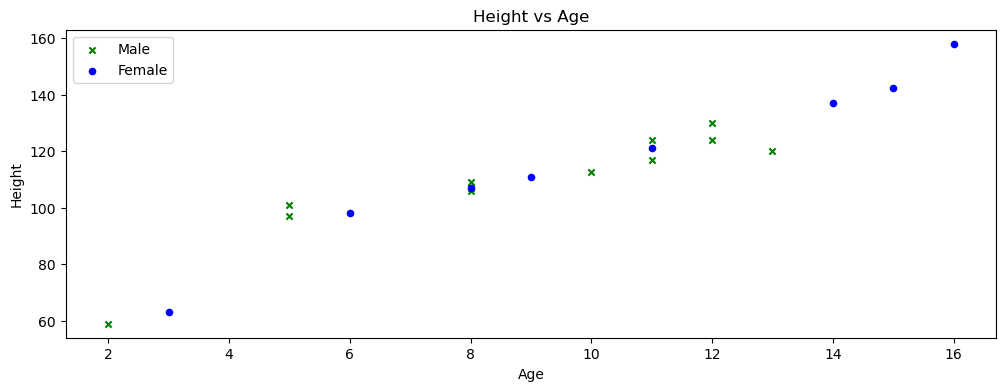

In [269]:
# filter the data before plotting, and plot multiple labelled datapoints
fig, axs = plt.subplots(figsize=(12, 4))
df.loc[df["Sex"] == "Male"].plot.scatter(
    x="Age", y="Height", ax=axs, label="Male", marker="x", color="green"
)
df.loc[df["Sex"] == "Female"].plot.scatter(
    x="Age", y="Height", ax=axs, label="Female", marker="o", color="blue"
)
plt.legend()
plt.title("Height vs Age")
plt.show()

[]

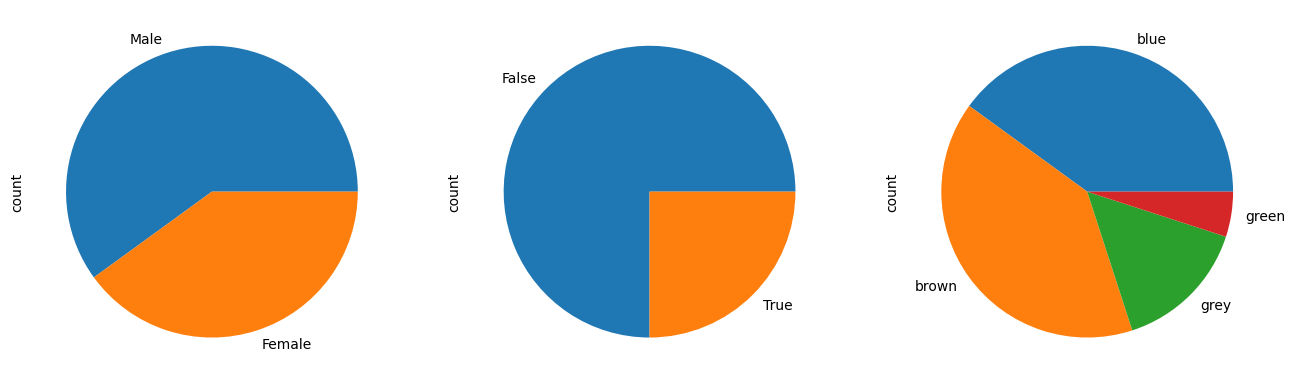

In [270]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
df["Sex"].value_counts().plot.pie(ax=axs[0])
df["Wears glasses"].value_counts().plot.pie(ax=axs[1])
df["Eye colour"].value_counts().plot.pie(ax=axs[2])
plt.plot()

[]

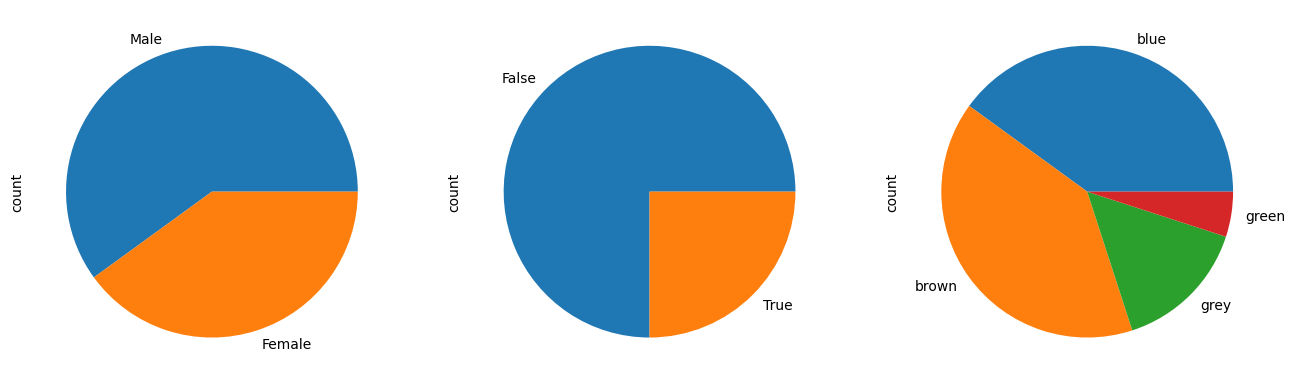

In [271]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
for ax, column in zip(axs, ["Sex", "Wears glasses", "Eye colour"]):
    df[column].value_counts().plot.pie(ax=ax)
plt.plot()

### Grouping

In [272]:
df.groupby(["Sex"]).groups

{'Female': [2, 4, 7, 9, 10, 12, 14, 17], 'Male': [0, 1, 3, 5, 6, 8, 11, 13, 15, 16, 18, 19]}

In [273]:
for group, data in df.groupby(["Sex"]):
    print(group)
    print(data.head())

('Female',)
      Name  Age     Sex  Height Eye colour  Wears glasses
2    Clare   15  Female   142.5      green          False
4   Hannah    9  Female   111.0       blue           True
7     Suzy   14  Female   137.0       grey           True
9    Josie    8  Female   107.0      brown          False
10  Claire   16  Female   158.0       blue          False
('Male',)
    Name  Age   Sex  Height Eye colour  Wears glasses
0    Bob   12  Male   130.0       blue           True
1  Simon   13  Male   120.0       blue          False
3   Jose   11  Male   117.0      brown          False
5   Ryan   11  Male   124.0      brown          False
6  Craig   12  Male   124.0      brown          False


In [274]:
df.groupby(["Sex"])["Name"].count()

Sex
Female     8
Male      12
Name: Name, dtype: int64

<Axes: ylabel='Name'>

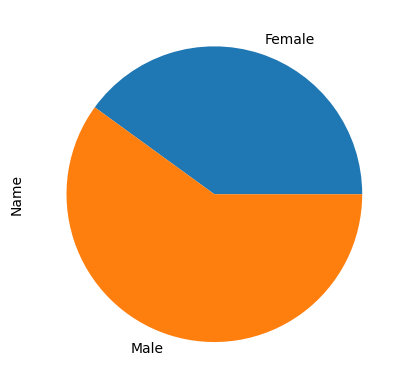

In [275]:
df.groupby(["Sex"])["Name"].count().plot.pie()

In [276]:
df.groupby(["Eye colour", "Sex"]).Name.count() # add .reset_index() to get back a DataFrame

Eye colour  Sex   
blue        Female    4
            Male      4
brown       Female    1
            Male      7
green       Female    1
            Male      0
grey        Female    2
            Male      1
Name: Name, dtype: int64

In [277]:
df.groupby(["Eye colour", "Sex"]).Name.count().unstack()

Sex,Female,Male
Eye colour,,
blue,4,4
brown,1,7
green,1,0
grey,2,1


array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

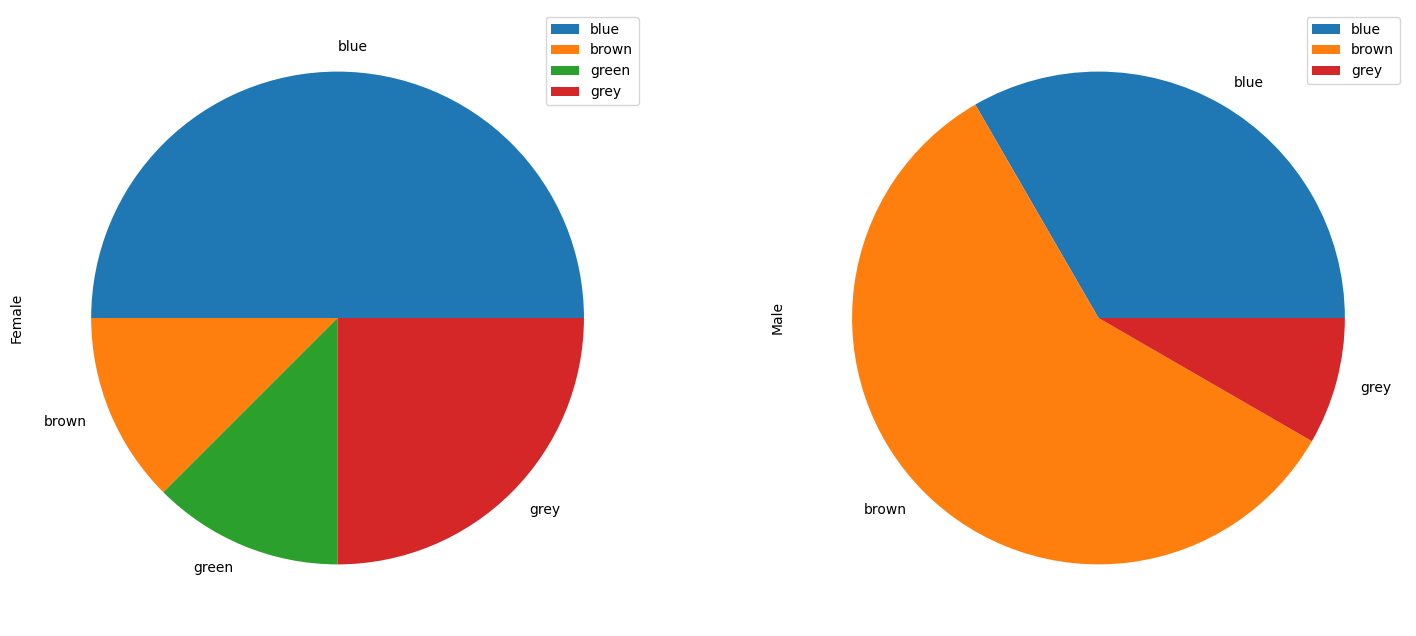

In [278]:
df.groupby(["Eye colour", "Sex"]).Name.count().unstack().plot.pie(subplots=True, figsize=(18, 8))